In [1]:
!nvidia-smi

Thu Oct  7 12:04:51 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install top2vec
!pip install umap-learn[plot]

In [3]:
import json
import requests

import umap
import umap.plot
import hdbscan

from top2vec import Top2Vec

In [4]:
url = 'http://tools.kinds.or.kr:8888/search/news'

datas = {
    "access_key": "9af2f705-2974-4340-8b55-d69040b944ab",

    "argument": {
        "query": {"title":""},
        "published_at": {
            "from": "2021-09-29",
            "until": "2021-10-06"
            },
            "provider": [],
            "category": ["001000000"],
            "category_incident": [""],
            "byline": "",
            "provider_subject": [""],
            "subject_info": [""],
            "subject_info1": [""],
            "subject_info2": [""],
            "subject_info3": [""],
            "subject_info4": [""],
            "sort": {"date": "asc"},
            "hilight": 200,
            "return_from": 0,
            "return_size": 100000,
            "fields": [
                "byline",
                "category",
                "category_incident",
                "provider_news_id",
                "hilight",
                ]
                }
         }

response = requests.post(url, data=json.dumps(datas))
js=response.json()

js

{'result': 0,
 'return_object': {'documents': [{'byline': '이민수 기자',
    'category': ['정치>국회_정당', '정치>선거'],
    'category_incident': [],
    'dateline': '2021-09-29T07:42:20.000+09:00',
    'enveloped_at': '2021-09-28T11:40:54.000+09:00',
    'hilight': '이재명 .."폐기물 발생지 처리 원칙 지키겠다"…인천 발전 5대 공약 발표 더불어민주당 제20대 대통령선거 경선후보인 이재명 경기도지사가 인천 최대 현안인 수도권매립지와 관련해 ..“폐기물 발생지 처리와 친환경 매립지 조성의 원칙을 지키겠다”고 강조했다... .. .. ..이 지사는 28일 오전 민주당 인천시당에서 ..‘인천 발전 5대 공약’을 발표하면..',
    'news_id': '01200101.20210929114054001',
    'provider': '경기일보',
    'provider_news_id': '2382488',
    'published_at': '2021-09-29T00:00:00.000+09:00',
    'title': '이재명 "폐기물 발생지 처리 원칙 지키겠다"…인천 발전 5대 공약 발표'},
   {'byline': '김지환',
    'category': ['정치>행정_자치', '사회>사건_사고', '사회>교육_시험'],
    'category_incident': [],
    'dateline': '2021-09-28T18:06:23.000+09:00',
    'enveloped_at': '2021-09-28T18:06:23.000+09:00',
    'hilight': '법조일원화\'반쪽 시행\'… 판사 인력난 오나 재판연구원 제도 도입 이외에 .. ..1심 전면 단독화 등 답보상태 .. ..법원내부 .."국회 소극적" 비판 .. .. .. .. .. .. .

In [5]:
total_hits = js['return_object']['total_hits']
print("결과 개수:",total_hits)

결과 개수: 8724


In [7]:
#total_hits = 10000
# 모든 타이틀
titles, hilights ,ths= [], [], []
for i in range(total_hits):
    title = js['return_object']['documents'][i]['title']
    hilight = js['return_object']['documents'][i]['hilight']
    th = title +","+ hilight

    #titles.append(title)
    #hilights.append(hilight)
    ths.append(th)
len(ths)

8724

In [8]:
model = Top2Vec(documents = ths, speed="learn")

2021-10-07 12:06:08,231 - top2vec - INFO - Pre-processing documents for training
2021-10-07 12:06:09,823 - top2vec - INFO - Creating joint document/word embedding
2021-10-07 12:06:43,050 - top2vec - INFO - Creating lower dimension embedding of documents
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)
2021-10-07 12:07:15,507 - top2vec - INFO - Finding dense areas of documents
2021-10-07 12:07:15,753 - top2vec - INFO - Finding topics


In [9]:
model._get_document_vectors()

array([[-1.05890699e-01, -4.64416072e-02, -5.79448380e-02, ...,
         1.23538844e-01, -6.25277460e-02, -2.53272224e-02],
       [ 5.31566963e-02,  1.66962780e-02, -1.69025697e-02, ...,
        -7.62286261e-02,  8.97346821e-04, -9.63573530e-02],
       [-1.98750012e-02,  5.52905127e-02,  4.50528714e-05, ...,
        -2.10017222e-03, -3.16474994e-04, -7.61498883e-02],
       ...,
       [ 7.33715966e-02, -2.93058250e-02, -6.57110512e-02, ...,
         7.19480887e-02,  5.38008846e-02, -8.26157257e-02],
       [-2.25456990e-02, -7.96422139e-02,  1.56252347e-02, ...,
         1.13810971e-01,  1.09113760e-01,  9.66045409e-02],
       [ 6.65228348e-03, -1.17620490e-02,  1.19968075e-02, ...,
         4.59473394e-02,  1.98376313e-01, -6.71346635e-02]], dtype=float32)

In [10]:
umap_args = {'n_neighbors': 15,
             'n_components': 2,
             'metric': 'cosine'}

mapper = umap.UMAP(**umap_args).fit(model._get_document_vectors(norm=False))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


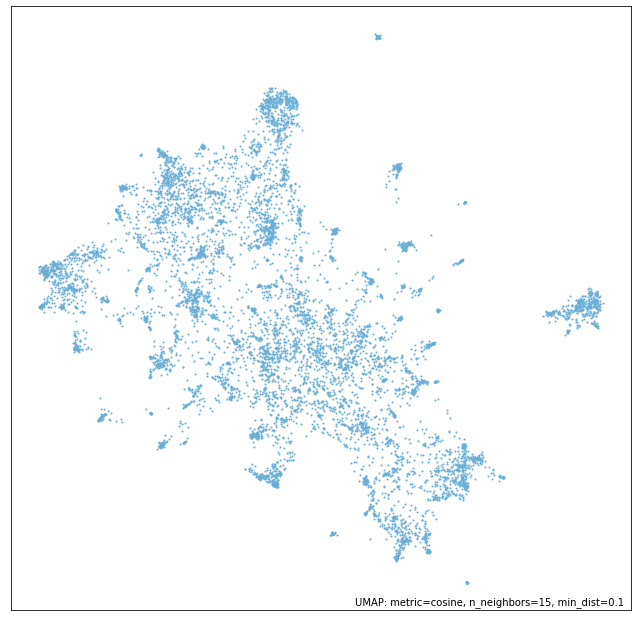

In [11]:
umap.plot.points(mapper)

In [12]:
hdbscan_args = {'min_cluster_size': 15,
                'metric': 'euclidean',
                'cluster_selection_method': 'eom'}

cluster = hdbscan.HDBSCAN(**hdbscan_args).fit(mapper.embedding_)

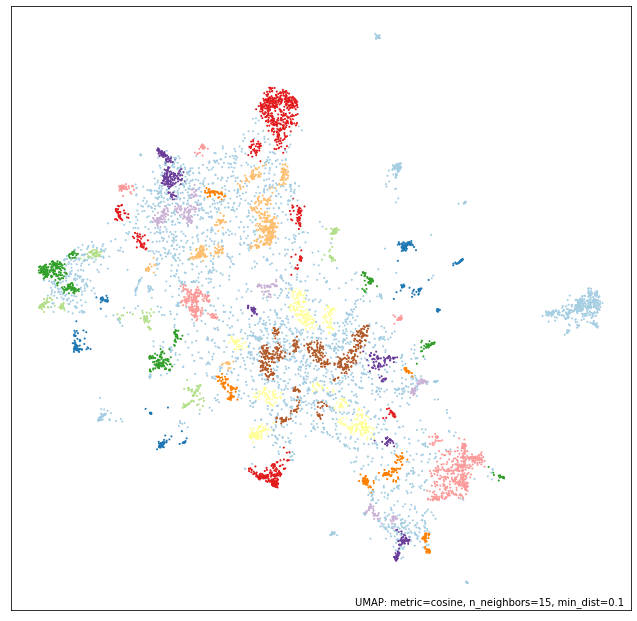

In [13]:
umap.plot.points(mapper,cluster.labels_, color_key_cmap='Paired',show_legend=False)

In [15]:
model.get_num_topics()

88

In [17]:
topic_sizes, topic_nums = model.get_topic_sizes()

In [18]:
topic_sizes

array([438, 380, 290, 270, 237, 234, 224, 215, 203, 159, 157, 157, 151,
       139, 136, 134, 133, 132, 132, 121, 117, 116, 113, 111, 110, 105,
        98,  95,  93,  92,  90,  90,  87,  87,  86,  85,  82,  82,  82,
        80,  80,  79,  79,  78,  76,  76,  76,  76,  75,  73,  69,  69,
        69,  69,  67,  67,  64,  62,  61,  61,  60,  60,  60,  59,  59,
        59,  57,  55,  54,  54,  54,  54,  53,  53,  48,  46,  45,  44,
        44,  43,  41,  41,  40,  39,  36,  34,  32,  31])

In [21]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=0, num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()


Document: 5238, Score: 0.9375861883163452
-----------
부울경 경선서도 이재명 ‘압승’···대세론 견고해지나,부울경 경선서도 이재명 ..‘압승’···대세론 견고해지나 이재명 경기지사가 2일 더불어민주당 대선 후보 선출을 위한 부산·울산·경남 지역 경선에서 55.34%를 얻어 누적 과반 득표율을 유지했다... 대장동 의혹에도 전날 제주 경선에서 압승을 거둔데 이어 또 다시 승리를 이어갔다... 이날 결과는 경선 조기 승부 여부를 결정지을 3일 2차 국민선거인단 ..
-----------

Document: 4557, Score: 0.9239568710327148
-----------
이재명, 제주 경선서도 과반 득표 대세론 확인,이재명, 제주 경선서도 과반 득표 대세론 확인 더불어민주당 대선후보 선출을 위한 제주 지역 경선에서 이재명 경기지사가 과반 득표로 압승을 거뒀다. ..이 지사는 1일 제주시 제주시 난타호텔에서 열린 제주지역 경선에서 득표율 56.75%로 1위에 올랐다. ..이날 투표에는 제주지역 선거인단 1만3346명 중 6971명이 참여했으며 이 지사는 과반이 넘는 ..
-----------

Document: 5854, Score: 0.922601580619812
-----------
이재명, 2차 슈퍼위크·인천 경선도 과반 압승,이재명, 2차 슈퍼위크·인천 경선도 과반 압승 이재명 경기지사가 3일 더불어민주당 경선 ..'2차 슈퍼위크'에서 과반 득표로 압승했다... 이날 열린 인천지역 경선에서도 마찬가지로 과반 득표로 승리했다. ..이 지사는 이날 오후 인천 송도컨벤시아에서 발표된 국민·일반당원 2차 선거인단 투표(2차 슈퍼위크)에서 58.1%를 얻어 누적 1위를 유지했다...
-----------

Document: 5911, Score: 0.9204639196395874
-----------
이재명, 2차 슈퍼위크 ‘60% 육박’ 압승…본선 직행 가능성 더 높아져,이재명, 2차 슈퍼위크 ..‘60% 육박

In [23]:
topic_words, word_scores, topic_nums = model.get_topics()

In [24]:
topic_words[0]

array(['과반', '득표로', '압승', '압승을', '직행', '누적', '선출을', '득표', '경선에서', '슈퍼위크',
       '득표율', '경선도', '순회', '제주', '선거인단', '위에', '부울경', '승리', '위를', '본선',
       '대세론', '올랐다', '인천', '지역', '울산', '경남', '더불어민주당의', '부산', '대선후보',
       '의혹에도', '경선이', '투표', '이낙연', '결과를', '경선', '진행된', '지사는', '경선을', '남은',
       '경기지사가', '후보가', '결선', '경기도지사가', '표심', '주목', '투표에서', '후보는', '결과',
       '민주당', '후보'], dtype='<U10')